<a href="https://colab.research.google.com/github/Jahanvi-206/Diabetes-Detection-AICTE/blob/main/Diabetes_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries and Dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

print("Step 1: Loading dataset...")

#dataset load directly from internet
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
             'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=col_names)

print("Data loaded. Showing first 5 rows:")
display(df.head())

Step 1: Loading dataset...
Data loaded. Showing first 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [20]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Data Pre-Processing Cleaning

In [21]:
print("--- DATA PREPROCESSING REPORT ---\n")

cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Missing Values (represented as 0) BEFORE cleaning:")
for col in cols_to_check:
    count = (df[col] == 0).sum()
    print(f"{col}: {count} missing values")

print("\n" + "="*40 + "\n")

print("Cleaning data... Replacing 0s with Mean values...\n")

for col in cols_to_check:
    # Modern way to replace values (assigning it back to the column)
    df[col] = df[col].replace(0, np.nan)

    # Calculating mean
    mean_val = df[col].mean()

    # Modern way to fill missing values (assigning it back to the column)
    df[col] = df[col].fillna(mean_val)

print("Missing Values AFTER cleaning:")
for col in cols_to_check:
    count = (df[col] == 0).sum()
    print(f"{col}: {count} missing values")

print("\nCleaning Complete!")
print("Showing sample of cleaned data (First 5 rows):")
display(df.head())

--- DATA PREPROCESSING REPORT ---

Missing Values (represented as 0) BEFORE cleaning:
Glucose: 5 missing values
BloodPressure: 35 missing values
SkinThickness: 227 missing values
Insulin: 374 missing values
BMI: 11 missing values


Cleaning data... Replacing 0s with Mean values...

Missing Values AFTER cleaning:
Glucose: 0 missing values
BloodPressure: 0 missing values
SkinThickness: 0 missing values
Insulin: 0 missing values
BMI: 0 missing values

Cleaning Complete!
Showing sample of cleaned data (First 5 rows):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


Training the Model


In [22]:
print("Step 3: Training the Machine Learning model...")

# Defining Features (X) and Target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Spliting data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Checking Accuracy of modelh
accuracy = model.score(X_test, y_test)
print(f"Model Training Finished!")
print(f"Model Accuracy on Test Data: {accuracy * 100:.2f}%")

Step 3: Training the Machine Learning model...
Model Training Finished!
Model Accuracy on Test Data: 75.32%


Data Visualization

Importance Graph...


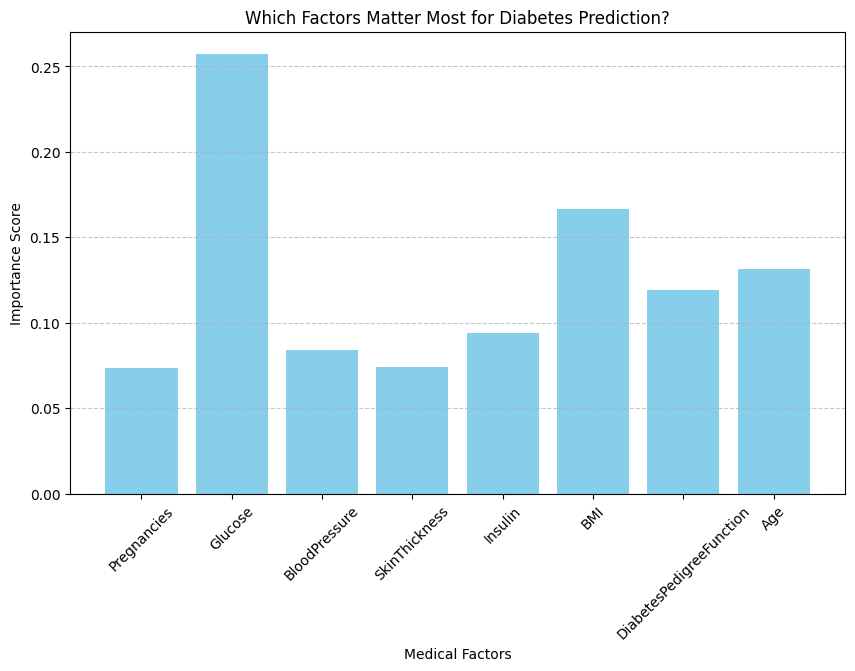

Graph 1 generated successfully.


In [23]:
print("Importance Graph...")

# Get importance scores from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='skyblue')
plt.title('Which Factors Matter Most for Diabetes Prediction?')
plt.xlabel('Medical Factors')
plt.ylabel('Importance Score')
plt.xticks(rotation=45) # Rotates text so it's readable
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Graph 1 generated successfully.")

Confusion Matrix Graph

Generating Confusion Matrix...


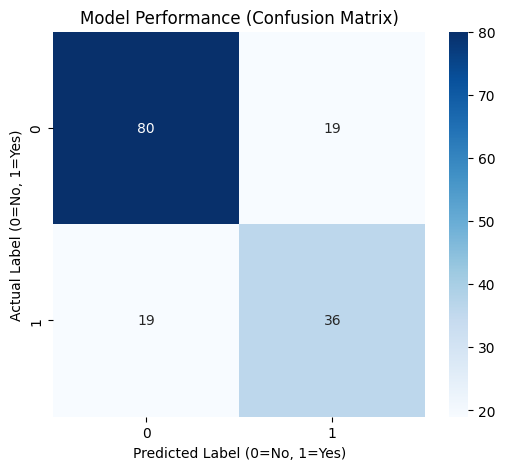

Graph 2 generated successfully.


In [24]:
print("Generating Confusion Matrix...")

# Make predictions on the test set to see how well we did
test_predictions = model.predict(X_test)

# Create the matrix
cm = confusion_matrix(y_test, test_predictions)

# Plot it using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Model Performance (Confusion Matrix)')
plt.ylabel('Actual Label (0=No, 1=Yes)')
plt.xlabel('Predicted Label (0=No, 1=Yes)')
plt.show()

print("Graph 2 generated successfully.")

The Prediction Logic


In [25]:
def predict_diabetes():
    print("\n--- PATIENT DIAGNOSTIC TOOL ---")
    print("Please enter the patient details below:")

    try:
        # Taking input from user
        preg = int(input("1. Number of Pregnancies: "))
        glucose = int(input("2. Glucose Level: "))
        bp = int(input("3. Blood Pressure: "))
        skin = int(input("4. Skin Thickness: "))
        insulin = int(input("5. Insulin Level: "))
        bmi = float(input("6. BMI: "))
        dpf = float(input("7. Diabetes Pedigree Function: "))
        age = int(input("8. Age: "))

        # Create a dataframe for this specific patient
        user_data = pd.DataFrame({
            'Pregnancies': [preg], 'Glucose': [glucose], 'BloodPressure': [bp],
            'SkinThickness': [skin], 'Insulin': [insulin], 'BMI': [bmi],
            'DiabetesPedigreeFunction': [dpf], 'Age': [age]
        })

        # Predict
        prediction = model.predict(user_data)[0]

        print("-" * 30)
        if prediction == 1:
            print("⚠️ RESULT: HIGH RISK (Diabetic)")
        else:
            print("✅ RESULT: LOW RISK (Non-Diabetic)")
        print("-" * 30)

    except ValueError:
        print("Error: Please enter numbers only.")

print("Prediction tool loaded successfully.")

Prediction tool loaded successfully.


Execution

In [27]:
predict_diabetes()



--- PATIENT DIAGNOSTIC TOOL ---
Please enter the patient details below:
1. Number of Pregnancies: 2
2. Glucose Level: 54
3. Blood Pressure: 120
4. Skin Thickness: 12
5. Insulin Level: 0
6. BMI: 35
7. Diabetes Pedigree Function: 0.127
8. Age: 47
------------------------------
✅ RESULT: LOW RISK (Non-Diabetic)
------------------------------
